In [1]:
import os
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import nnframework

from nnframework.utils.core import convert_categorical2one_hot

In [3]:
# number of samples in the data set
N_SAMPLES = 2000
# number of classes
N_CLASSES = 6
# number of features
N_FEATURES = 2
# ratio between training and test sets
TEST_SIZE = 0.1
# 
RANDOM_SEED = 42

In [4]:
X, y = make_blobs(
    n_samples = N_SAMPLES,
    n_features = N_FEATURES,
    centers = N_CLASSES,
    cluster_std = 1.2,
    random_state=50
)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_SEED)
y_train = convert_categorical2one_hot(y_train)
y_test = convert_categorical2one_hot(y_test)

print(f"X shape: {X.shape}, y: {y.shape}")

X shape: (2000, 2), y: (2000,)


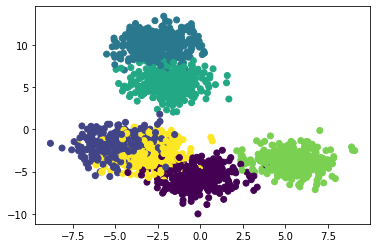

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap());

# Build model

In [6]:
from nnframework.layers import Linear, SoftmaxLayer, ReluLayer
from nnframework.optimizers import GradientDescent
from nnframework.model import Sequential

layers = [
    Linear(in_features=N_FEATURES, out_features=25),
    Linear(in_features=25, out_features=20),
    ReluLayer(),
    Linear(in_features=20, out_features=N_CLASSES),
    SoftmaxLayer()
]

optimizer = GradientDescent(lr=0.005)

model = Sequential(
    layers=layers,
    optimizer=optimizer
)

In [7]:
model

In [10]:
model.train(
    x_train=X_train, 
    y_train=y_train, 
    x_test=X_test, 
    y_test=y_test, 
    epochs=300,
    verbose=True
)

cy: 0.90500 | time: 00:00:00.01
iter: 00045 | test loss: 0.23966 | test accuracy: 0.90500 | time: 00:00:00.01
iter: 00046 | test loss: 0.23920 | test accuracy: 0.90500 | time: 00:00:00.01
iter: 00047 | test loss: 0.23876 | test accuracy: 0.90500 | time: 00:00:00.01
iter: 00048 | test loss: 0.23832 | test accuracy: 0.90500 | time: 00:00:00.01
iter: 00049 | test loss: 0.23790 | test accuracy: 0.90500 | time: 00:00:00.01
iter: 00050 | test loss: 0.23748 | test accuracy: 0.90500 | time: 00:00:00.01
iter: 00051 | test loss: 0.23703 | test accuracy: 0.90500 | time: 00:00:00.01
iter: 00052 | test loss: 0.23663 | test accuracy: 0.90500 | time: 00:00:00.01
iter: 00053 | test loss: 0.23623 | test accuracy: 0.90500 | time: 00:00:00.01
iter: 00054 | test loss: 0.23583 | test accuracy: 0.90500 | time: 00:00:00.01
iter: 00055 | test loss: 0.23544 | test accuracy: 0.90500 | time: 00:00:00.01
iter: 00056 | test loss: 0.23504 | test accuracy: 0.90500 | time: 00:00:00.01
iter: 00057 | test loss: 0.23466

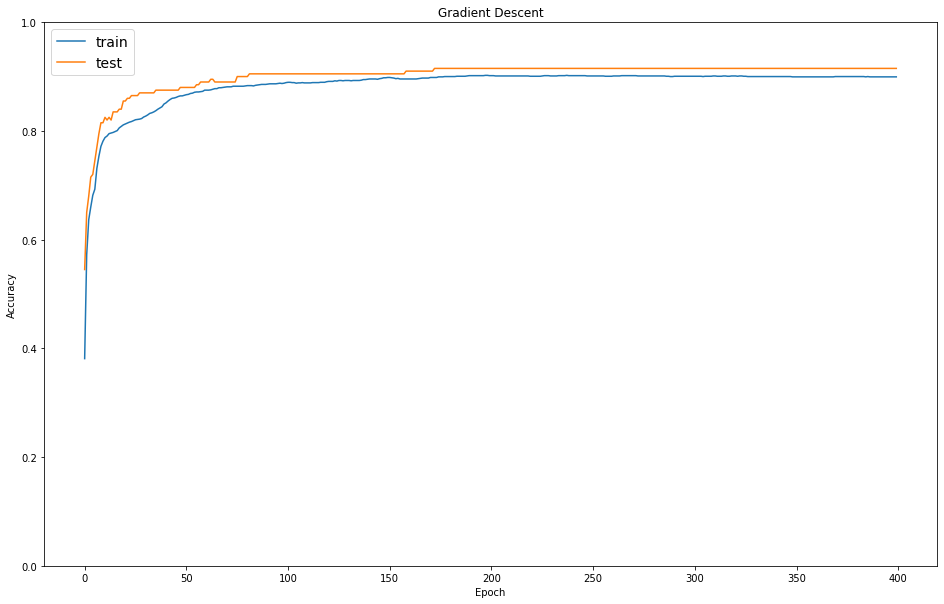

In [11]:
plt.figure(figsize=(16,10))
plt.title("Gradient Descent")

plt.plot(model.history["train_acc"], label="train")
plt.plot(model.history["test_acc"], label="test")
plt.legend(loc="upper left", prop={'size': 14})
plt.ylim(0., 1.)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

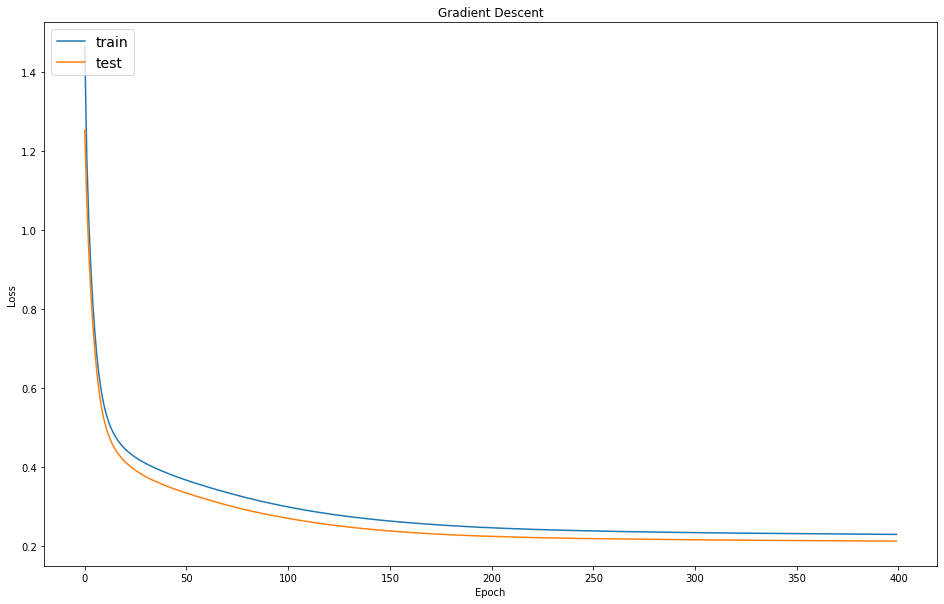

In [12]:

plt.figure(figsize=(16,10))
plt.title("Gradient Descent")
plt.plot(model.history["train_loss"], label="train")
plt.plot(model.history["test_loss"], label="test")
plt.legend(loc="upper left", prop={'size': 14})
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()